In [14]:
# importing libraries
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np
from imutils import face_utils
from torchvision import transforms
import glob
%matplotlib inline
import pandas as pd

font = cv2.FONT_HERSHEY_SIMPLEX

In [15]:
#torch.cuda.is_available()
device = torch.device('cpu')#'cuda' if torch.cuda.is_available else 'cpu'
device

device(type='cpu')

In [16]:
mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20, device = device)
#image_size=240, margin=0, min_face_size=20, device= device)
resnet = InceptionResnetV1(pretrained='vggface2', device= device).eval()

dataset=datasets.ImageFolder('lfw_split/train/')
print(len(dataset))
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()} 
def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

face_list = [] 
name_list = [] 
embedding_list = [] 



40


In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='face_detection_yolov5s.pt',device=device)



for imgs, idx in loader:

    transform1 = transforms.ToTensor()
    tensor = transform1(imgs)
    t = transforms.functional.adjust_gamma(tensor, gamma=2, gain=3)

    transform2 = transforms.ToPILImage()

    # convert the tensor to PIL image using above transform
    imgss = transform2(t)

    img =  np.array(imgss)
    

    results = model(img)
    faces = results.pandas().xyxy[0]
    if faces.empty:
          continue
    print(faces)
    #faces = faces.sort_values(by='confidence', ascending=False)
    x = round(faces['xmin'][0])
    y = round(faces['ymin'][0])
    w = round(faces['xmax'][0])
    h = round(faces['ymax'][0])
    img_ = img[y:h, x:w]
    print(type(img_))
    print(img_.shape)

    img_padding = np.pad(img_, ((100, 100), (200, 200), (0,0)), constant_values=0)

    face, prob = mtcnn(img_padding, return_prob=True) 
    confidence = faces['confidence'][0]
    if face is not None and prob>0.90:
        emb = resnet(face.unsqueeze(0)) 
        embedding_list.append(emb.detach()) 
        name_list.append(idx_to_class[idx]) 





print(len(face_list))
print(len(name_list))
print(len(embedding_list))


Using cache found in C:\Users\s.ezati/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-18 Python-3.7.6 torch-1.11.0+cpu CPU

Fusing layers... 
newYOLOv5s summary: 224 layers, 7053910 parameters, 0 gradients
Adding AutoShape... 


        xmin       ymin        xmax        ymax  confidence  class  name
0  66.674759  49.060329  167.917633  196.264343       0.753      0  Face
<class 'numpy.ndarray'>
(147, 101, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax       ymax  confidence  class  name
0  72.585007  51.608276  168.490677  193.27359    0.835175      0  Face
<class 'numpy.ndarray'>
(141, 95, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  89.268051  57.024879  177.853119  189.579758    0.844589      0  Face
<class 'numpy.ndarray'>
(133, 89, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  75.123558  53.579468  180.738556  198.619659    0.748834      0  Face
<class 'numpy.ndarray'>
(145, 106, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


         xmin        ymin        xmax        ymax  confidence  class  name
0   73.751907   56.588432  171.190048  188.401901    0.879722      0  Face
1  215.871964  108.833603  249.886703  170.044037    0.680250      0  Face
<class 'numpy.ndarray'>
(131, 97, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  77.183418  48.725372  179.234604  186.110718    0.739423      0  Face
<class 'numpy.ndarray'>
(137, 102, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  44.851593  53.901024  143.182953  187.243225    0.565899      0  Face
<class 'numpy.ndarray'>
(133, 98, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax       ymax  confidence  class  name
0  49.629982  37.379654  169.905457  201.25618    0.452736      0  Face
<class 'numpy.ndarray'>
(164, 120, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  85.295708  72.411469  175.949097  192.053711    0.460799      0  Face
<class 'numpy.ndarray'>
(120, 91, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax       ymax  confidence  class  name
0  82.911423  54.945763  181.772614  185.74939    0.874338      0  Face
<class 'numpy.ndarray'>
(131, 99, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  97.857498  62.159946  189.982254  190.723831    0.853181      0  Face
<class 'numpy.ndarray'>
(129, 92, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  75.018562  69.016449  168.160126  194.620087    0.871691      0  Face
<class 'numpy.ndarray'>
(126, 93, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  73.921623  64.684532  163.347672  196.190292    0.847255      0  Face
<class 'numpy.ndarray'>
(131, 89, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin      ymin        xmax       ymax  confidence  class  name
0  80.838005  61.72876  181.089233  193.66481     0.81698      0  Face
<class 'numpy.ndarray'>
(132, 100, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  83.509521  55.025742  184.488678  189.362915    0.846106      0  Face
<class 'numpy.ndarray'>
(134, 100, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  81.606438  57.971943  188.539276  199.184097    0.842624      0  Face
<class 'numpy.ndarray'>
(141, 107, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  80.304138  58.000118  186.040451  196.226624      0.8571      0  Face
<class 'numpy.ndarray'>
(138, 106, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  79.078209  62.255516  181.088715  196.478317    0.873579      0  Face
<class 'numpy.ndarray'>
(134, 102, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax       ymax  confidence  class  name
0  94.541733  58.453655  179.917191  183.50943    0.773861      0  Face
<class 'numpy.ndarray'>
(126, 85, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  87.621964  61.162075  185.912003  201.879501     0.79936      0  Face
<class 'numpy.ndarray'>
(141, 98, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  56.868305  50.646812  165.018936  204.000168    0.742226      0  Face
<class 'numpy.ndarray'>
(153, 108, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


       xmin       ymin        xmax        ymax  confidence  class  name
0  91.95047  60.833252  189.077972  194.407578    0.811487      0  Face
<class 'numpy.ndarray'>
(133, 97, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  95.305527  51.702827  186.010834  187.901215    0.707304      0  Face
<class 'numpy.ndarray'>
(136, 91, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


         xmin       ymin        xmax        ymax  confidence  class  name
0  208.618042  79.556541  249.960648  181.129532    0.857043      0  Face
1   74.948982  51.755112  169.521912  195.172073    0.764094      0  Face
2   17.636633  87.977531   77.367088  208.093246    0.311463      0  Face
<class 'numpy.ndarray'>
(101, 41, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


         xmin       ymin        xmax        ymax  confidence  class  name
0  188.615631  46.322090  247.037796  153.060486    0.769060      0  Face
1   71.486771  54.516136  161.046112  199.093552    0.714484      0  Face
<class 'numpy.ndarray'>
(107, 58, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  77.732376  56.029022  173.502014  188.252899    0.761364      0  Face
<class 'numpy.ndarray'>
(132, 96, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  80.014984  54.882111  179.526917  186.429276     0.79042      0  Face
<class 'numpy.ndarray'>
(131, 100, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  85.492538  52.908691  178.774979  184.378815     0.75735      0  Face
<class 'numpy.ndarray'>
(131, 94, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  86.937576  66.177536  172.278748  192.409286    0.838465      0  Face
<class 'numpy.ndarray'>
(126, 85, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  65.157417  59.027733  167.049652  196.365372     0.74905      0  Face
<class 'numpy.ndarray'>
(137, 102, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  95.116859  61.706978  183.269028  190.985901    0.786906      0  Face
<class 'numpy.ndarray'>
(129, 88, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  70.579552  66.017456  151.901917  192.029892    0.779514      0  Face
<class 'numpy.ndarray'>
(126, 81, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


         xmin       ymin        xmax        ymax  confidence  class  name
0   69.540726  60.481853  159.205231  194.869049    0.826220      0  Face
1  189.965042   0.737584  245.243149   26.994806    0.604499      0  Face
2  143.932800   0.000000  243.779266  115.889191    0.394868      0  Face
3    0.138229  48.049980   35.931721  183.416916    0.384832      0  Face
<class 'numpy.ndarray'>
(135, 89, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax       ymax  confidence  class  name
0  74.263123  59.347816  184.630203  198.55957    0.836427      0  Face
<class 'numpy.ndarray'>
(140, 111, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


       xmin       ymin        xmax        ymax  confidence  class  name
0  66.95459  43.617756  161.922913  189.721115    0.755016      0  Face
<class 'numpy.ndarray'>
(146, 95, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  70.395096  47.551144  162.459183  191.064758    0.799957      0  Face
<class 'numpy.ndarray'>
(143, 92, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin       xmax        ymax  confidence  class  name
0  74.561707  66.159676  158.69281  187.824188     0.84542      0  Face
<class 'numpy.ndarray'>
(122, 84, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin       ymin        xmax        ymax  confidence  class  name
0  78.497345  64.389290  162.191055  193.616028    0.724533      0  Face
1  17.022541  80.335411   74.790466  161.681030    0.556388      0  Face
<class 'numpy.ndarray'>
(130, 84, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin        ymin        xmax        ymax  confidence  class  name
0  74.314629   69.643997  166.039078  201.338074    0.720926      0  Face
1   0.021911  147.204269   48.760174  250.000000    0.456446      0  Face
<class 'numpy.ndarray'>
(131, 92, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        xmin      ymin        xmax        ymax  confidence  class  name
0  86.082031  64.96183  177.749329  194.489227    0.866637      0  Face
<class 'numpy.ndarray'>
(129, 92, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


0
40
40


In [18]:
data = [embedding_list, name_list]
print(data[1])
torch.save(data, 'data.pt') 

['Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Sorkin', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdullah', 'Abdullah', 'Abdullah', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_al-Attiyah', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Pacheco', 'Abel_Pacheco', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Adam_Sandler', 'Adam_Sandler', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adel_Al-Jubeir', 'Adolfo_Aguilar_Zinser', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adrian_McPherson']


In [19]:
def face_match(img_path, data_path): 
    img_s = Image.open(img_path)
 
    transform1 = transforms.ToTensor()
    tensor = transform1(img_s)
    t = transforms.functional.adjust_gamma(tensor, gamma=2, gain=3)
    transform2 = transforms.ToPILImage()
    # convert the tensor to PIL image using above transform
    imgss = transform2(t)
    img =  np.array(imgss)
    #print(img)

    results = model(img)
    #results.show()
    faces = results.pandas().xyxy[0]
   # print(faces)
    if faces.empty:
        img_ = img
    else:
        #faces = faces.sort_values(by='confidence', ascending=False)
       # print(faces)
        x = round(faces['xmin'][0])
        y = round(faces['ymin'][0])
        w = round(faces['xmax'][0])
        h = round(faces['ymax'][0])
        img_ = img[y:h, x:w]
    
    print(img_.shape)
     #padding
    new = Image.fromarray(img_)
    img_padding = np.pad(img_, ((100, 100), (200, 200), (0,0)), constant_values=0)
   
   # img_pil = Image.fromarray(img)0
   # tensor_input = transform1(new_image)
    
    #plt.figure(figsize=(5,5))
   # plt.imshow(img_padding)

    img_pil = Image.fromarray(img_padding)
    face, prob = mtcnn(img_pil, return_prob=True) 
    
    if face is None:
        emb = transform1(new.resize((240,240)).unsqueeze(0)).detach() 

    else:
        emb = resnet(face.unsqueeze(0)).detach() 

#    emb = resnet(tensor_input.unsqueeze(0).cuda()).detach() 

    saved_data = torch.load('data.pt') 
    embedding_list = saved_data[0] 
    name_list = saved_data[1] 
    dist_list = [] 
    
    for idx, emb_db in enumerate(embedding_list):
        dist = torch.dist(emb, emb_db).item()
        dist_list.append(dist)

    output_list_name = []
    output_list_similarity = []
    d = {'index':[0],'name': ['not match'], 'distance': [100000]}
    df = pd.DataFrame(data=d)
    index = 1
    for dist__ in dist_list:
        if dist__ <= 0.6:
            idx = dist_list.index(dist__)
            df = df.append({'index':index, 'name':name_list[idx].replace('_',' ')
                            , 'distance':dist__}, ignore_index=True)
            index = index + 1
        else:
            continue
    return df.groupby(['name']).count().sort_values(by='index', ascending=False)

image_list = []
y_real = []
for filename in glob.glob('lfw_split/test/*/*.jpg'): #assuming gif
    image_list.append(filename)
    y_real.append(filename.split('\\')[1].split('0')[0].replace('_','').replace('.jpg',''))
    
predict_y = []
count = 1
for i in image_list:   
    print(count)
    result = face_match(i, 'data.pt')
    print(result)
    predict_y.append(result.index[0].replace(' ',''))
    count =count + 1
    print('Face matched with:',result.index[0])


1
(145, 91, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


               index  distance
name                          
Aaron Peirsol      1         1
not match          1         1
Face matched with: Aaron Peirsol
2
(164, 109, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
3
(128, 95, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


                     index  distance
name                                
Abdel Nasser Assidi      1         1
not match                1         1
Face matched with: Abdel Nasser Assidi
4
(152, 104, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


                index  distance
name                           
Abdoulaye Wade      2         2
not match           1         1
Face matched with: Abdoulaye Wade
5
(133, 94, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
6
(140, 94, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
7
(143, 94, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


              index  distance
name                         
Abdullah Gul      3         3
not match         1         1
Face matched with: Abdullah Gul
8
(133, 94, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


              index  distance
name                         
Abdullah Gul      5         5
not match         1         1
Face matched with: Abdullah Gul
9
(137, 95, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


              index  distance
name                         
Abdullah Gul      5         5
not match         1         1
Face matched with: Abdullah Gul
10
(132, 95, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


              index  distance
name                         
Abdullah Gul      3         3
not match         1         1
Face matched with: Abdullah Gul
11
(127, 86, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
12
(131, 91, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
13
(146, 96, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
14
(141, 90, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
15
(129, 89, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
16
(121, 83, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


                index  distance
name                           
Adel Al-Jubeir      1         1
not match           1         1
Face matched with: Adel Al-Jubeir
17
(136, 86, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


                       index  distance
name                                  
Adolfo Aguilar Zinser      1         1
not match                  1         1
Face matched with: Adolfo Aguilar Zinser
18
(135, 87, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match
19
(130, 93, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


           index  distance
name                      
not match      1         1
Face matched with: not match


In [20]:
print(len(y_real))
print(len(predict_y))
print(type(y_real))



19
19
<class 'list'>


In [21]:
accuracy_marker = []
conf_y_real = []
conf_y_pred = []
marker = 0
for i in range(0,len(y_real)):
   # print(y[i])
   # print(predict_y[i])
    conf_y_real.append(0)
    if (y_real[i] == predict_y[i]) is True:
        accuracy_marker.append(0)
        conf_y_pred.append(0)
        marker +=1
    else:
        accuracy_marker.append(1)
        conf_y_pred.append(1)

    
print("accuracy:",marker/len(accuracy_marker))


accuracy: 0.47368421052631576


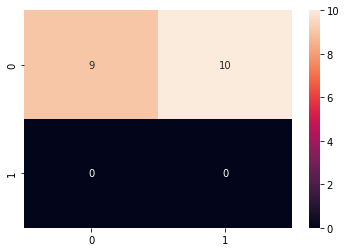

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(conf_y_real,conf_y_pred)

sn.heatmap(confusion_matrix, annot=True)
plt.show()

# haraa cascade with mtcnn

#### accuracy : 77%

#### problem : haara is not good for faces except frontFaces

# yolo with mtcnn

#### accuracy : 80%


# yolo with resnet

#### accuracy : 94.73%